## Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as st
# Importing plot libs
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('darkgrid')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pal = sns.color_palette('rainbow')
pal.as_hex()

['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']

In [4]:
str(pal.as_hex())

"['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']"

## Reading Dataset

In [5]:
df = pd.read_csv('games.csv')

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Replacing column names.
new_names = []

for old_name in df.columns:
    name_lowered = old_name.lower()
    new_names.append(name_lowered)

df.columns = new_names

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
(df
 .isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : "Column", 0 : "Missing"})
)

,Column,Missing
0,critic_score,8578
1,rating,6766
2,user_score,6701
3,year_of_release,269
4,name,2
5,genre,2
6,platform,0
7,na_sales,0
8,eu_sales,0
9,jp_sales,0


In [11]:
# Dropping null values in year_of_release, name and genre, as they are few and will not harm our analysis.
df = df.dropna(subset=['year_of_release', 'name', 'genre'])

I chose to leave the values in user_score, critic_score and rating blank. As there are a large number of missing values in user_score and critic_score, I thought it would be dangerous to fill them with the mean or median, as this could distort the analysis, as well as rating values.

I believe that these missing values come from old games (pre-2000), where data with user and critic ratings had not yet been popularized. Even with these missing values we can continue our analysis with the values we have.

In [12]:
# Converting the column for user_score to float.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# Converting the year_of_release column to int.
df['year_of_release'] = df['year_of_release'].astype(int)

In [13]:
# Calculating the total sales of each game and adding it to a column.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [15]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [16]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [17]:
cols = df[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score','user_score',  'total_sales']]
cols.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411,-0.267851,-0.076220
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.240083,0.085549,0.941241
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.221276,0.055530,0.901673
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.153474,0.126372,0.613305
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.198410,0.056935,0.748930
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000,0.579671,0.245349
user_score,-0.267851,0.085549,0.055530,0.126372,0.056935,0.579671,1.000000,0.087984
total_sales,-0.076220,0.941241,0.901673,0.613305,0.748930,0.245349,0.087984,1.000000


### Games released each year.

In [18]:
print(df['year_of_release'].min())
print(df['year_of_release'].max())

1980
2016


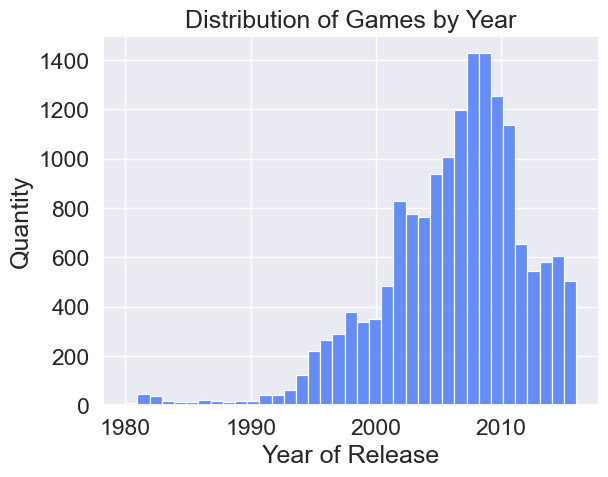

In [19]:
sns.histplot(data=df, x='year_of_release', bins=37);
plt.title('Distribution of Games by Year');
plt.xlabel('Year of Release');
plt.ylabel('Quantity');

We noticed the popularity of games really starting in the 2000s, there is a big peak starting in 2007, which makes the years after that a good year to focus on the analysis.

### Platforms with the most sales.

In [20]:
df['platform'].nunique()

31

In [21]:
# Adding the total sales of each platform
platform_sales = df.groupby('platform')[['total_sales']].sum()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


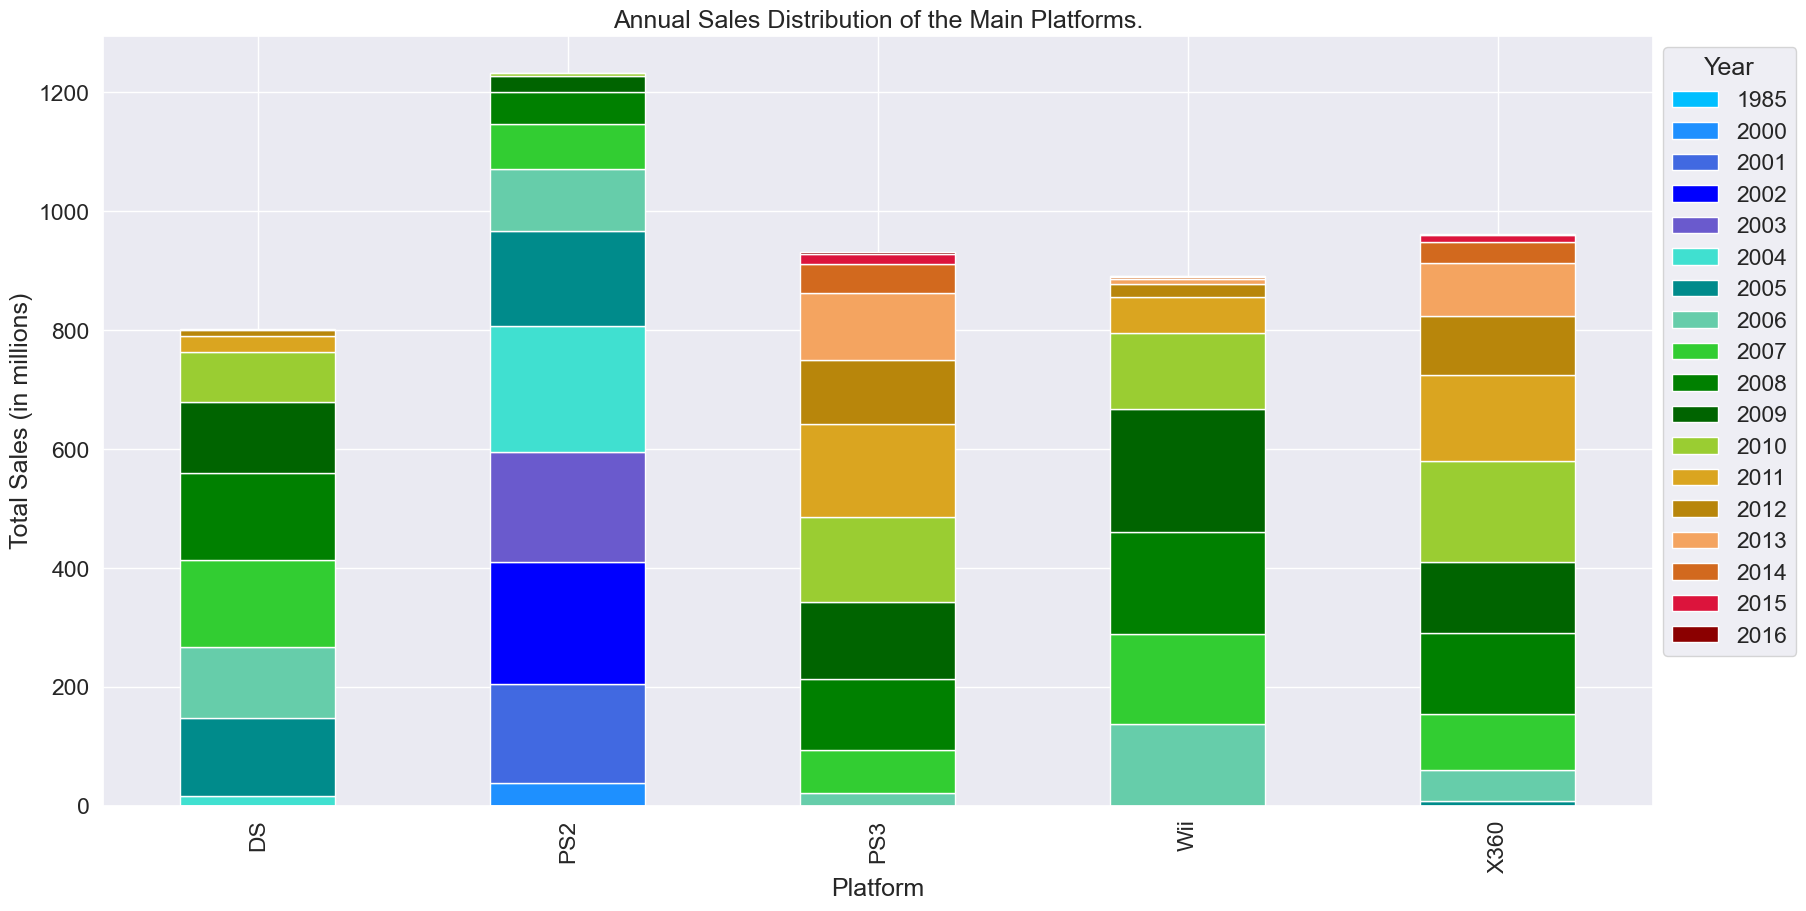

In [22]:
# Extracting only the 5 platforms with the most sales.
top5_platform = platform_sales.head()
# Obtaining the dataframe with only the 5 platforms with the most sales.
top5_platform = df[df['platform'].isin(top5_platform.index)]
# Grouping the dataframe by platform, adding the total sales of each one, and obtaining over the years.
platform_by_year = top5_platform.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

colors = ['DeepSkyBlue', 'DodgerBlue', 'RoyalBlue', 'Blue', 'SlateBlue', 'Turquoise', 'DarkCyan', 'MediumAquamarine', 'LimeGreen', 'Green', 
          'DarkGreen', 'YellowGreen', 'Goldenrod', 'DarkGoldenrod', 'SandyBrown', 'Chocolate', 'Crimson', 'DarkRed']

ax = platform_by_year.plot(kind='bar', stacked=True, figsize=(20, 10), color=colors);
ax.legend(title='Year', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.title('Annual Sales Distribution of the Main Platforms.');
plt.xlabel('Platform');
plt.ylabel('Total Sales (in millions)');

We have noticed a decrease in the number of sales of these platforms in recent years, most likely being closed to make way for their successor.

### Duration of platforms.

In [23]:
# Grouping the minimum and maximum data for the years of each platform.
year_per_platform = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
# Getting the duration of each platform.
year_per_platform['duration'] = year_per_platform['max'] - year_per_platform['min']
year_per_platform

,platform,min,max,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


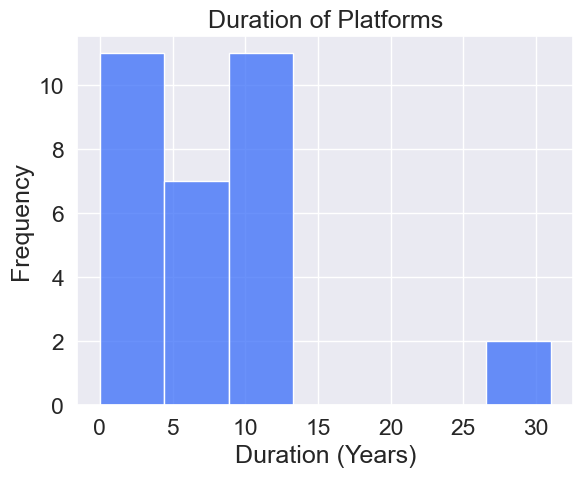

In [24]:
sns.histplot(data=year_per_platform, x='duration');
plt.title('Duration of Platforms');
plt.xlabel('Duration (Years)');
plt.ylabel('Frequency');

In [25]:
# Obtendo a média de duração das plataformas.
year_per_platform['duration'].mean()

7.612903225806452

We can see that on average platforms last approximately 7 years, however we can see that in the case of platforms with many sales, in the case of our top 5 platforms, they last 10 years or more, as in the case of the DS which lasted for 28 long years, and the PC which is a constantly evolving platform that is not replaced by successors.

### Filtering the dataframe with the most relevant data

In [26]:
filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2017)]
best_sellers = filtered_df.groupby('platform')['total_sales'].sum().reset_index()
best_sellers = best_sellers.sort_values(by='total_sales', ascending=False)
best_sellers = best_sellers.head(6)
filtered_df = filtered_df[filtered_df['platform'].isin(best_sellers['platform'])] 

Here I chose to work only with data from 2013 until 2017 to be able to analyze current trends.

### Sales of leading platforms

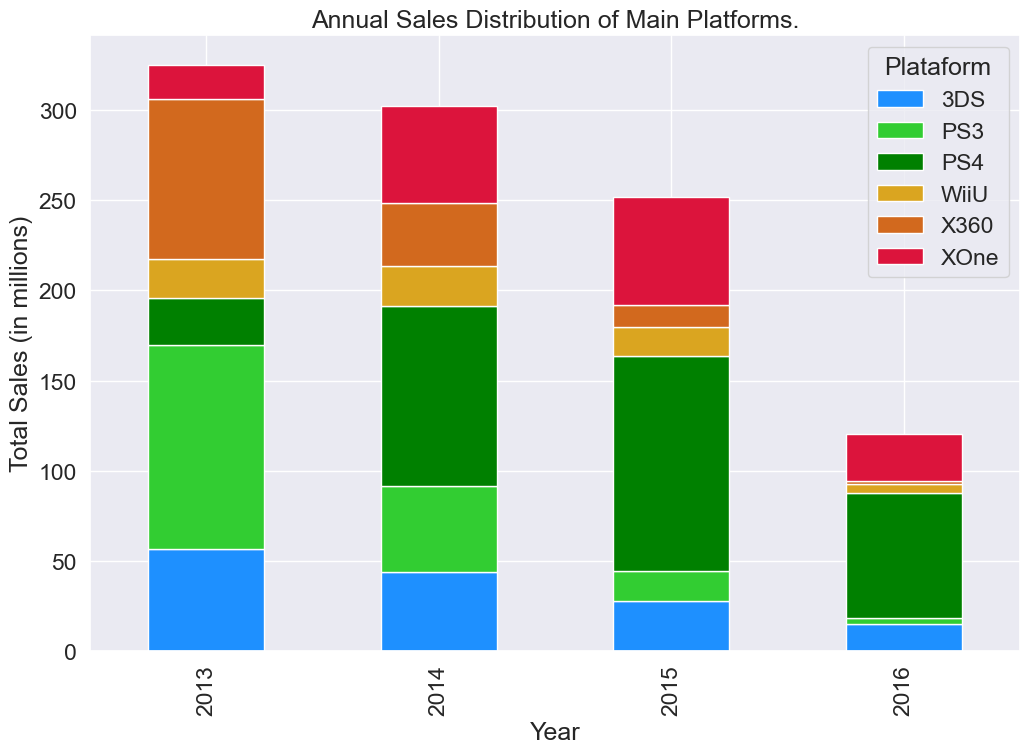

In [27]:
# Grouping the dataframe by platform, adding the total sales of each one, and obtaining over the years.
platform_sales = filtered_df.groupby(['year_of_release', 'platform'])[['total_sales']].sum().unstack()
platform_sales = platform_sales.fillna(0)

colors = ['DodgerBlue', 'LimeGreen', 'Green', 'Goldenrod', 'Chocolate', 'Crimson']

ax = platform_sales.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors);
ax.legend(title='Plataform', labels=[label[1] for label in platform_sales.columns],  bbox_to_anchor=(1.0, 1), loc='upper right')
plt.title('Annual Sales Distribution of Main Platforms.');
plt.xlabel('Year');
plt.ylabel('Total Sales (in millions)');

Here we have interesting data. If we look closely at the consoles with the most sales (3DS, PS4, WiiU and XOne), we see large amounts of sales in their few years of launch, we can believe that this is due to the fact that they are successors to consoles that have always had large sales (DS, PS3, Wii and X360).

In [28]:
# Obtaining the average sales for each platform.
platform_sales_mean = filtered_df.groupby('platform')[['total_sales']].mean().reset_index()
platform_sales_mean = platform_sales_mean.sort_values(by='total_sales', ascending=False)
platform_sales_mean

,platform,total_sales
2,PS4,0.801378
4,X360,0.735484
5,XOne,0.645020
3,WiiU,0.562000
1,PS3,0.525884
0,3DS,0.472772


### How user and critic reviews affect sales.

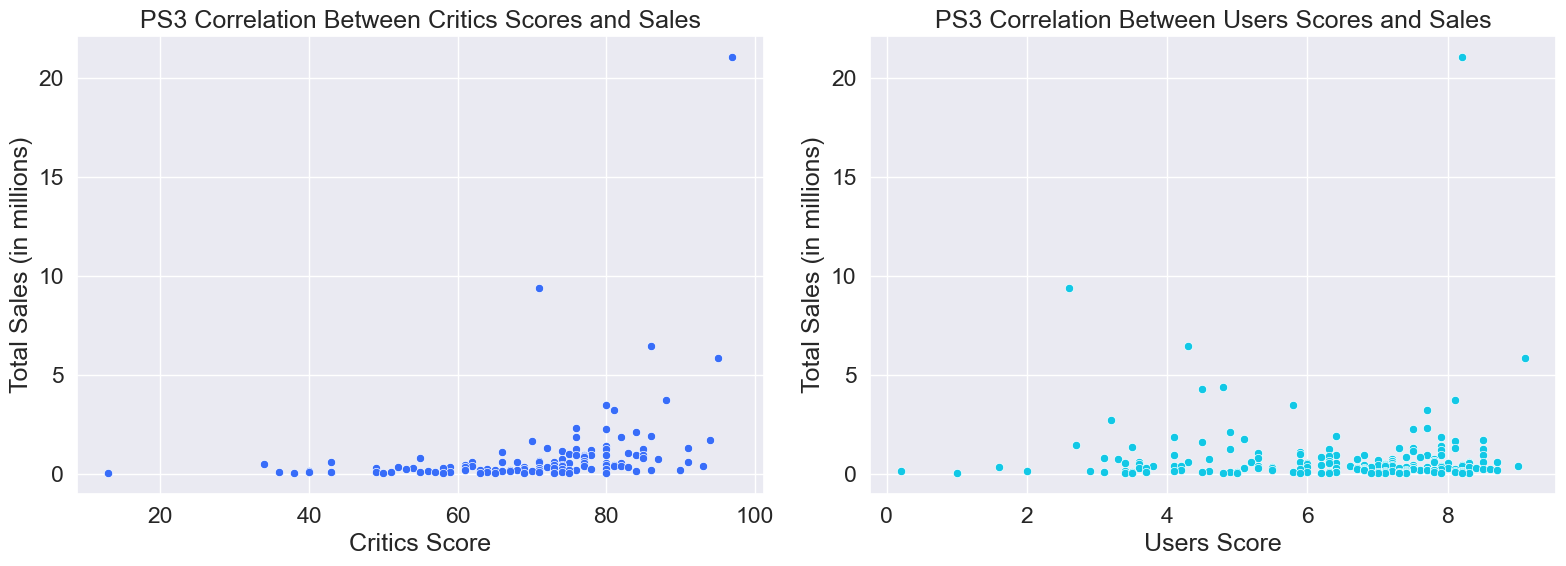

In [29]:
# Filtering only games available on PS3
df_ps3 = filtered_df[filtered_df['platform'] == 'PS3']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df_ps3, x='critic_score', y='total_sales', color='#386df9', ax=axes[0]);
axes[0].set_title('PS3 Correlation Between Critics Scores and Sales');
axes[0].set_xlabel('Critics Score');
axes[0].set_ylabel('Total Sales (in millions)');

sns.scatterplot(data=df_ps3, x='user_score', y='total_sales', color='#12c8e6', ax=axes[1]);
axes[1].set_title('PS3 Correlation Between Users Scores and Sales')
axes[1].set_xlabel('Users Score');
axes[1].set_ylabel('Total Sales (in millions)');

plt.tight_layout()

In [30]:
# Getting the correlation of critic_score and user_score in total_sales.
correlation_critic_sales = df_ps3['critic_score'].corr(df_ps3['total_sales'])
correlation_user_sales = df_ps3['user_score'].corr(df_ps3['total_sales'])

print("Correlation between critics scores and PS3 sales:", correlation_critic_sales)
print("Correlation between users scores and PS3 sales:", correlation_user_sales)

Correlation between critics scores and PS3 sales: 0.3342853393371919
Correlation between users scores and PS3 sales: 0.0023944027357566907


We can see a moderate correlation between critics' scores and game sales, and a low correlation with user scores.

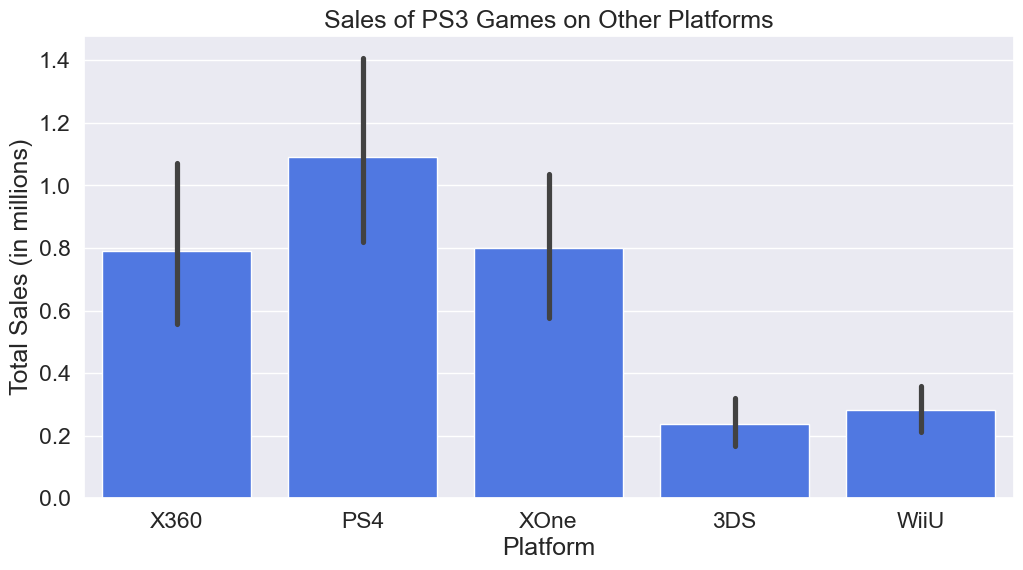

In [31]:
# Getting ps3 games.
ps3_games = df_ps3['name'].unique()
# Filtering PS3 games that are also available on other platforms.
df_other_platforms = filtered_df[filtered_df['name'].isin(ps3_games)]
df_other_platforms = df_other_platforms[df_other_platforms['platform'] != 'PS3']

plt.figure(figsize=(12, 6));
sns.barplot(data=df_other_platforms, x='platform', y='total_sales');
plt.title('Sales of PS3 Games on Other Platforms');
plt.xlabel('Platform');
plt.ylabel('Total Sales (in millions)');

We noticed that the platform that sold the most games on the PS3 was its PS4 sequel, followed by the X360, XOne, and Wii.

### Best and worst genres.

In [32]:
# Adding the total sales of each genre
genre_sales = filtered_df.groupby('genre')[['total_sales']].sum().reset_index()
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

std_derivation = filtered_df.groupby('genre')['total_sales'].std().reset_index()

print('Most profitable genres:')
print(genre_sales.head())
print('\nLeast profitable genres:')
print(genre_sales.tail())
print('\nStandard deviation of sales by gender:')
print(std_derivation)

Most profitable genres:
           genre  total_sales
0         Action       300.71
8        Shooter       221.70
10        Sports       144.94
7   Role-Playing       129.76
3           Misc        50.95

Least profitable genres:
         genre  total_sales
2     Fighting        34.00
1    Adventure        18.76
9   Simulation        13.25
11    Strategy         4.42
5       Puzzle         3.11

Standard deviation of sales by gender:
           genre  total_sales
0         Action     1.435515
1      Adventure     0.297830
2       Fighting     1.135128
3           Misc     1.091495
4       Platform     0.833153
5         Puzzle     0.341791
6         Racing     1.065777
7   Role-Playing     1.646673
8        Shooter     2.171745
9     Simulation     0.971940
10        Sports     1.314630
11      Strategy     0.214640


We can see that Action is the most profitable genre with a big advantage.

### Data by each region

In [33]:
# Creating a function to filter the dataframe by the chosen column and region, and filtering only the 5 best-selling ones.
def filter_region(df, column, region):
    df = df.groupby(column)[region].sum().reset_index()
    df = df.sort_values(by=region, ascending=False).head(5)
    return df

In [34]:
na_platform = filter_region(filtered_df, 'platform', 'na_sales')
na_platform

,platform,na_sales
2,PS4,108.74
5,XOne,93.12
4,X360,81.66
1,PS3,63.50
0,3DS,38.20


In [35]:
eu_platform = filter_region(filtered_df, 'platform', 'eu_sales')
eu_platform

,platform,eu_sales
2,PS4,141.09
1,PS3,67.81
5,XOne,51.59
4,X360,42.52
0,3DS,30.96


In [36]:
jp_platform = filter_region(filtered_df, 'platform', 'jp_sales')
jp_platform

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PS4,15.96
3,WiiU,10.88
4,X360,0.51


We see that the top 3 in NA and EU are the same with different orders, being X360, PS3 and Wii. At JP we noticed the preference for portable consoles, such as DS, 3DS and PSP.

We can also notice that there are much more sales in NA, with the X360 being the platform with the most sales, in the EU the PS3 has more sales, but it still has more sales in NA, as well as the DS which is the favorite in JP, has more sales in NA.

In [37]:
na_genre = filter_region(filtered_df, 'genre', 'na_sales')
na_genre

,genre,na_sales
0,Action,121.09
8,Shooter,105.97
10,Sports,64.66
7,Role-Playing,43.07
3,Misc,23.09


In [38]:
eu_genre = filter_region(filtered_df, 'genre', 'eu_sales')
eu_genre

,genre,eu_sales
0,Action,110.28
8,Shooter,81.51
10,Sports,57.14
7,Role-Playing,33.17
6,Racing,19.31


In [39]:
jp_genre = filter_region(filtered_df, 'genre', 'jp_sales')
jp_genre

,genre,jp_sales
7,Role-Playing,43.17
0,Action,33.78
2,Fighting,6.98
3,Misc,6.94
8,Shooter,6.56


We noticed that Action is an extremely famous genre, being top 1 in NA and EU, and top 2 in JP. In NA and EU the next 3 genres remain the same, being Shooter, Sports and Misc. In JP we noticed the preference in the Role-Playing genre.

In [40]:
na_rating = filter_region(filtered_df, 'rating', 'na_sales')
na_rating

,rating,na_sales
2,M,157.76
0,E,77.79
1,E10+,46.74
3,T,45.17


In [41]:
eu_rating = filter_region(filtered_df, 'rating', 'eu_sales')
eu_rating

,rating,eu_sales
2,M,133.82
0,E,77.35
3,T,35.03
1,E10+,34.73


In [42]:
jp_rating = filter_region(filtered_df, 'rating', 'jp_sales')
jp_rating

,rating,jp_sales
3,T,15.36
0,E,14.94
2,M,12.69
1,E10+,5.61


Here we note what was expected, the best-selling games in all regions are rated Everyone, but those Mature and Teen are not far behind and also have good sales.

### Testing hypotheses.

In [43]:
filtered_df['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU'], dtype=object)

In [44]:
# Hypothesis about the difference in average ratings of XBOX ONE and PC users
# H0: The average ratings of XBOX ONE users are the same as PC users.
# H1: The average ratings of XBOX ONE users are different from PC users.

xone_scores = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()
ps4_scores = filtered_df[filtered_df['platform'] == 'PS4']['user_score'].dropna()

xone_var = xone_scores.var()
ps4_var = ps4_scores.var()
print(f'Xbox One Scores Variance: {xone_var}')
print(f'PS4 Scores Variance: {ps4_var}')
print()

alpha = 0.05

results = st.ttest_ind(xone_scores, ps4_scores, equal_var=False)

print(f'valor-p: {results.pvalue}')
if results.pvalue < alpha:
    print('We reject the null hypothesis. Scores averages are different for XBOX ONE and PS4')
else:
    print('We cannot reject the null hypothesis. There is no significant difference between the average scores of XBOX ONE and PS4')

Xbox One Scores Variance: 1.9069968429360695
PS4 Scores Variance: 2.1300848127431906

valor-p: 0.09855299487302606
We cannot reject the null hypothesis. There is no significant difference between the average scores of XBOX ONE and PS4


Based on the sample analyzed. We see that there is no significant difference between the difference in scores on Xbox One and PS4.

In [45]:
filtered_df['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [46]:
# Hypothesis about the difference in the average ratings of users in the Action genre and the Sports genre.
# H0: The average ratings of users in the Action genre are the same as those of users in the Sports genre
# H1: The average ratings of users in the Action genre are different from users in the Sports genre.

action_scores = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()
sports_scores = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()

action_var = action_scores.var()
sports_var = sports_scores.var()
print(f'Variance of Action Genre Scores: {action_var}')
print(f'Variance of Sports Genre Scores: {sports_var}')
print()

alpha = 0.05

results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f'valor-p: {results.pvalue}')
if results.pvalue < alpha:
    print('We reject the null hypothesis. Scores averages are different for Action and Sports genres')
else: 
    print('We cannot reject the null hypothesis. There is no significant difference between the average scores for the Action and Sports genres')

Variance of Action Genre Scores: 1.6716624472573842
Variance of Sports Genre Scores: 3.123362527369409

valor-p: 3.75246904019523e-17
We reject the null hypothesis. Scores averages are different for Action and Sports genres


Based on the sample analyzed, we see that the average scores are different for the Action and Sports genres.

## Final Conclusions

After cleaning the data and adding the column for 'total_sales', we analyzed the dataframe and filtered only the data from the most relevant years for the analysis, from 2007 to 2016 (which would be the current year), with this data we can notice in the analysis that the platforms that had led in sales for years were now giving way to their respective successor platforms (such as the PS4 replacing the PS3, the XOne replacing the X360 and the WiiU replacing the Wii), and considering that they lead in sales in all regions, leads to an easy decision to focus games and campaigns on those platforms. Now about genres, Action is by far the genre with the most sales, making it the best to focus on regardless of region. Shooter and Sports are also great genres for campaigns in the NA and EU regions, while in the JP region, Role-Playing is the best bet.